In [115]:
import math
import os
from pathlib import Path
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [33]:
root_directory = Path('..')
result_directory = os.path.join(root_directory,'data','result')
misc_directory = os.path.join(root_directory,'data','misc')
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

# Reward Design

In [75]:
reward_design_grid_filepath = os.path.join(misc_directory,'reward_design_grid.csv')
reward_design_grid = pd.read_csv(reward_design_grid_filepath)
reward_design_grid['w_1'] = reward_design_grid['weight']
reward_design_grid['w_2'] = 1.0 - reward_design_grid['weight']
reward_design_grid['e'] = reward_design_grid['exponent']
reward_design_grid = reward_design_grid[
    (reward_design_grid['type']=='reward.AdditiveReward')
    |((reward_design_grid['type']=='reward.MultiplicativeReward') & (reward_design_grid['w_1']*reward_design_grid['w_2']>0.0))
]
completed_simulations = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
episodes = 10

# read data
reward_design_simulations = []


for simulation_id in completed_simulations:
    for episode in range(episodes):
        filepath = os.path.join(result_directory,f'reward_function_{simulation_id}_episode_{episode}.pkl')
        
        with (open(filepath, 'rb')) as openfile:
            env = pickle.load(openfile)

        cost, carbon_emission = env.evaluate()
        record = {
            'simulation_id':f'reward_function_{simulation_id}',
            'episode':episode,
            'cost':cost,
            'carbon_emission':carbon_emission,
            'average':(cost + carbon_emission)/2
        }
        reward_design_simulations.append(record)

reward_design_simulations = pd.DataFrame(reward_design_simulations)
reward_design_simulations = reward_design_simulations.merge(reward_design_grid,on='simulation_id',how='inner')
reward_design_simulations = reward_design_simulations.drop(columns=['exponent','weight'])

# ordered  results
reward_design_simulations = reward_design_simulations[['simulation_id','type','buildings','w_1','w_2','e','episode','cost','carbon_emission','average']].copy()
reward_design_simulations = reward_design_simulations.sort_values('average')
display(reward_design_simulations[reward_design_simulations['episode']==9])

,simulation_id,type,buildings,w_1,w_2,e,episode,cost,carbon_emission,average
9,reward_function_0,reward.AdditiveReward,"[1, 13, 14]",0.0,1.0,1,9,1.010159,1.028855,1.019507
29,reward_function_2,reward.AdditiveReward,"[1, 13, 14]",0.2,0.8,1,9,1.010231,1.045203,1.027717
189,reward_function_18,reward.AdditiveReward,"[1, 13, 14]",1.0,0.0,1,9,1.010785,1.053621,1.032203
109,reward_function_10,reward.AdditiveReward,"[1, 13, 14]",0.6,0.4,1,9,0.991684,1.079288,1.035486
149,reward_function_14,reward.AdditiveReward,"[1, 13, 14]",0.8,0.2,1,9,1.009715,1.066637,1.038176
69,reward_function_6,reward.AdditiveReward,"[1, 13, 14]",0.4,0.6,1,9,1.006724,1.089517,1.048120
49,reward_function_4,reward.AdditiveReward,"[1, 13, 14]",0.2,0.8,2,9,1.016448,1.085442,1.050945
19,reward_function_1,reward.AdditiveReward,"[1, 13, 14]",0.0,1.0,2,9,0.989162,1.119373,1.054267
159,reward_function_15,reward.MultiplicativeReward,"[1, 13, 14]",0.8,0.2,1,9,1.023186,1.090075,1.056631
119,reward_function_11,reward.MultiplicativeReward,"[1, 13, 14]",0.6,0.4,1,9,1.031489,1.128066,1.079778


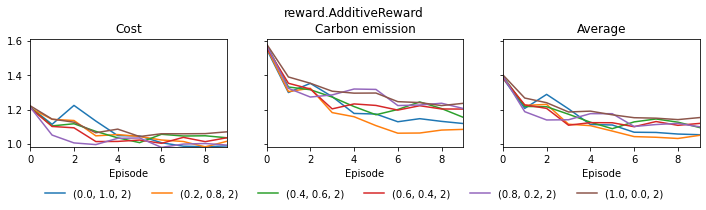

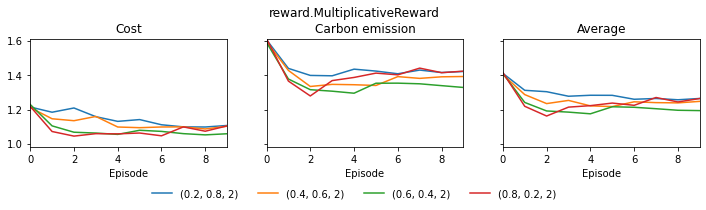

In [149]:
# trajectory
row_count = 1
column_count = 3
plot_data = reward_design_simulations[reward_design_simulations['e']==2].copy()
ylim = (plot_data[['cost','carbon_emission','average']].min().min(),plot_data[['cost','carbon_emission','average']].max().max())

for reward_type, type_group in plot_data.groupby('type'):
    fig, axs = plt.subplots(row_count,column_count,figsize=(4*column_count,2.0*row_count),sharey=True)
    
    for (e, w_1, w_2, simulation_id), simulation_id_group in type_group.groupby(['e','w_1','w_2','simulation_id']):
        label = f"({round(w_1,1)}, {round(w_2,1)}, {round(e,1)})"
        simulation_id_group = simulation_id_group.sort_values('episode')

        # cost
        x, y = simulation_id_group['episode'], simulation_id_group['cost']
        axs[0].plot(x,y,label=label)
        axs[0].set_title('Cost')

        # carbon_emission
        x, y = simulation_id_group['episode'], simulation_id_group['carbon_emission']
        axs[1].plot(x,y,label=label)
        axs[1].set_title('Carbon emission')

        # average
        x, y = simulation_id_group['episode'], simulation_id_group['average']
        axs[2].plot(x,y,label=label)
        axs[2].set_title('Average')

    for i, ax in enumerate(fig.axes):
        ax.set_xlabel('Episode')
        ax.set_ylim(ylim)

        if i == 0:
            ax.legend(
                bbox_to_anchor=(0.5,-0.1),
                loc='upper center', 
                bbox_transform=fig.transFigure,
                framealpha=0,
                ncol=6
            )
        else:
            pass
    
    fig.suptitle(reward_type,y=1.10)
    # plt.tight_layout()
    plt.show()

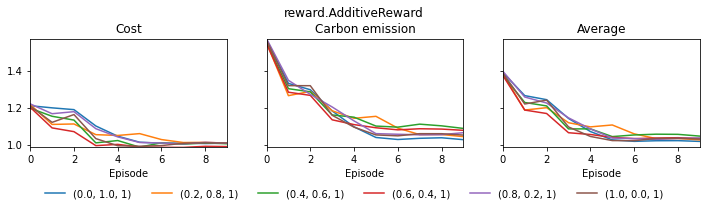

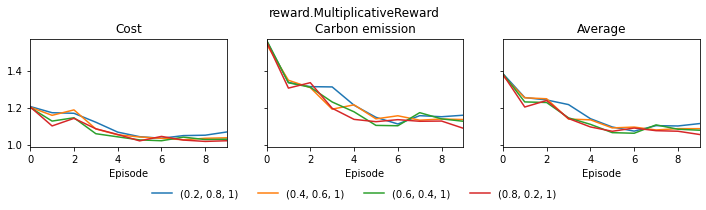

In [150]:
# trajectory
row_count = 1
column_count = 3
plot_data = reward_design_simulations[reward_design_simulations['e']==1].copy()
ylim = (plot_data[['cost','carbon_emission','average']].min().min(),plot_data[['cost','carbon_emission','average']].max().max())

for reward_type, type_group in plot_data.groupby('type'):
    fig, axs = plt.subplots(row_count,column_count,figsize=(4*column_count,2.0*row_count),sharey=True)
    
    for (e, w_1, w_2, simulation_id), simulation_id_group in type_group.groupby(['e','w_1','w_2','simulation_id']):
        label = f"({round(w_1,1)}, {round(w_2,1)}, {round(e,1)})"
        simulation_id_group = simulation_id_group.sort_values('episode')

        # cost
        x, y = simulation_id_group['episode'], simulation_id_group['cost']
        axs[0].plot(x,y,label=label)
        axs[0].set_title('Cost')

        # carbon_emission
        x, y = simulation_id_group['episode'], simulation_id_group['carbon_emission']
        axs[1].plot(x,y,label=label)
        axs[1].set_title('Carbon emission')

        # average
        x, y = simulation_id_group['episode'], simulation_id_group['average']
        axs[2].plot(x,y,label=label)
        axs[2].set_title('Average')

    for i, ax in enumerate(fig.axes):
        ax.set_xlabel('Episode')
        ax.set_ylim(ylim)

        if i == 0:
            ax.legend(
                bbox_to_anchor=(0.5,-0.1),
                loc='upper center', 
                bbox_transform=fig.transFigure,
                framealpha=0,
                ncol=6
            )
        else:
            pass
    
    fig.suptitle(reward_type,y=1.10)
    # plt.tight_layout()
    plt.show()

# RBC Validation

In [109]:
# RBC Validation
# read actual battery consumption
battery_data = pd.read_csv(os.path.join(misc_directory,'battery_electricity_consumption.csv'))
battery_data.columns = ['timestamp','building_id','actual_electrical_storage_electricity_consumption']
buildings = [2,3,6,7,8,9]
battery_data = battery_data[battery_data['building_id'].isin(buildings)]
battery_data['timestamp'] = pd.to_datetime(battery_data['timestamp'])
battery_data['building_id'] = battery_data['building_id'].map(lambda x: f'Building_{x}')
timestamps =pd.DataFrame({'timestamp':battery_data['timestamp'].unique()})

# read simulation data
rbc_validation_grid_filepath = os.path.join(misc_directory,'rbc_validation_grid.csv')
rbc_validation_grid = pd.read_csv(rbc_validation_grid_filepath)
rbc_validation_simulations = []

for simulation_id in rbc_validation_grid['simulation_id'].tolist():
    filepath = os.path.join(result_directory,f'{simulation_id}_episode_0.pkl')
    
    with (open(filepath, 'rb')) as openfile:
        env = pickle.load(openfile)

    for b in env.buildings:
        data = pd.DataFrame({
            'simulation_net_electricity_consumption':b.net_electricity_consumption,
            'simulation_net_electricity_consumption_without_storage':b.net_electricity_consumption_without_storage,
            'simulation_electrical_storage_net_electricity_consumption':b.electrical_storage.electricity_consumption,
        })
        data['building_id'] = b.name
        data['timestamp'] = timestamps
        data['simulation_id'] = simulation_id
        rbc_validation_simulations.append(data)

rbc_validation_simulations = pd.concat(rbc_validation_simulations,ignore_index=True)
rbc_validation_simulations = rbc_validation_simulations.merge(rbc_validation_grid,on='simulation_id',how='inner')
rbc_validation_simulations = rbc_validation_simulations.merge(battery_data,on=['building_id','timestamp'],how='inner')
rbc_validation_simulations['error'] =  rbc_validation_simulations['simulation_electrical_storage_net_electricity_consumption'] - rbc_validation_simulations['actual_electrical_storage_electricity_consumption']
rbc_validation_simulations['ratio'] =  rbc_validation_simulations['simulation_electrical_storage_net_electricity_consumption']/rbc_validation_simulations['actual_electrical_storage_electricity_consumption']
rbc_validation_simulations['percentage_error'] = rbc_validation_simulations['error']*100/rbc_validation_simulations['actual_electrical_storage_electricity_consumption']
rbc_validation_simulations['hour'] = rbc_validation_simulations['timestamp'].dt.hour

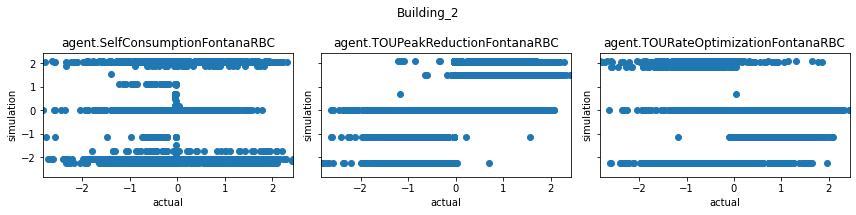

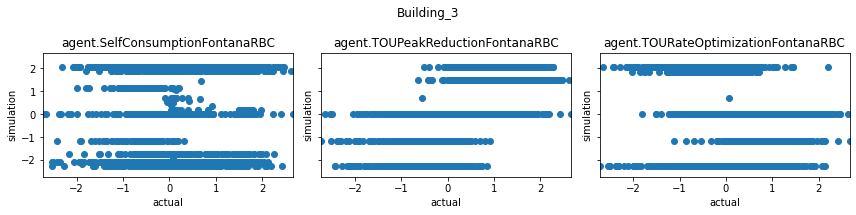

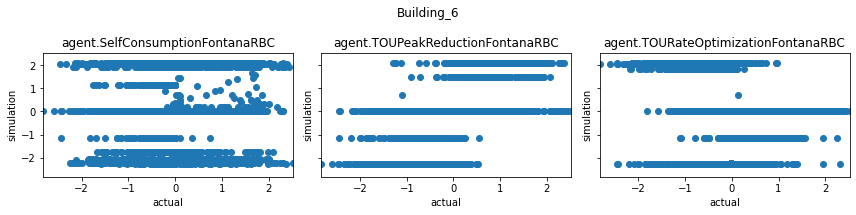

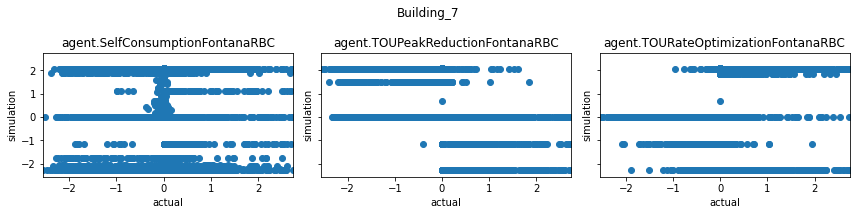

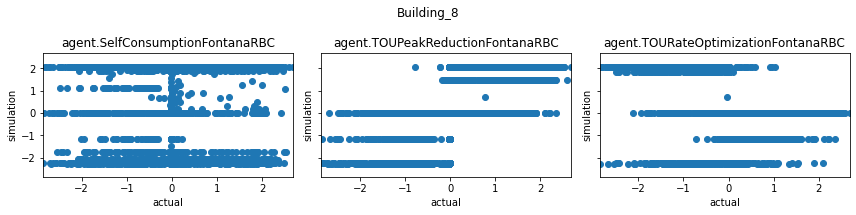

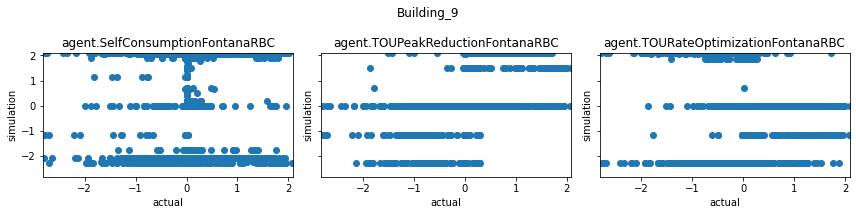

In [106]:
for building, building_data in rbc_validation_simulations.groupby('building_id'):
    row_count = 1
    column_count = len(rbc_validation_grid)
    fig, axs = plt.subplots(row_count, column_count, figsize=(4*column_count,3*row_count),sharex=True,sharey=True)

    for ax, (rbc_type, rbc_data) in zip(fig.axes, building_data.groupby('type')):
        x = rbc_data['actual_electrical_storage_electricity_consumption'] 
        y = rbc_data['simulation_electrical_storage_net_electricity_consumption']
        lim = (min(x.min(),y.min()), max(x.max(),y.max()))
        ax.scatter(x,y)
        ax.set_xlabel('actual')
        ax.set_ylabel('simulation')
        ax.set_title(rbc_type)
        ax.set_xlim(lim)
        ax.set_ylim(lim)
    
    fig.suptitle(building)
    plt.tight_layout()
    plt.show()

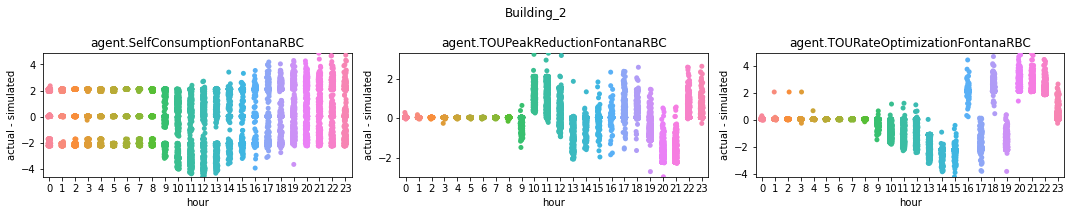

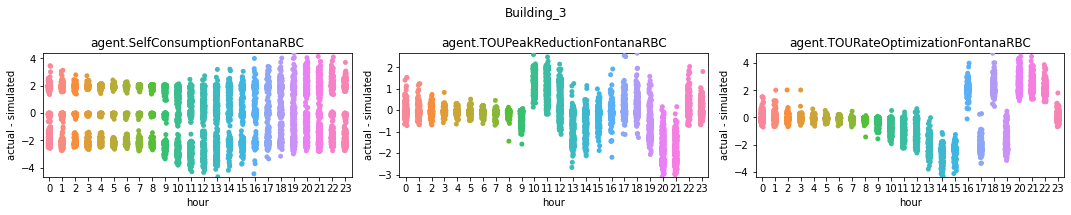

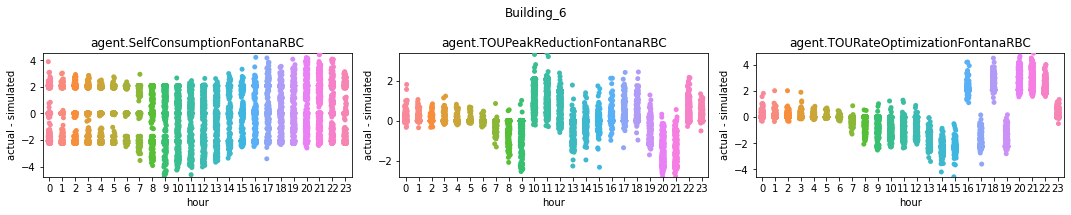

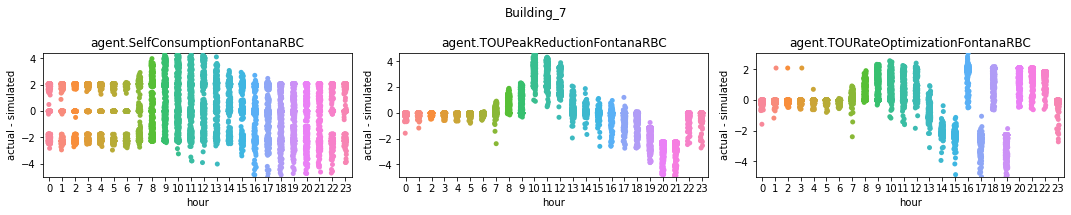

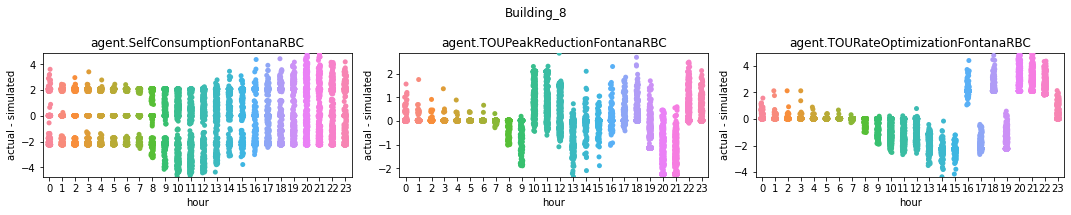

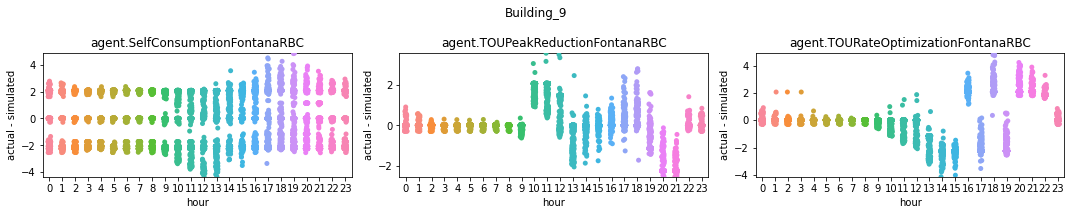

In [114]:
# hourly difference between actual and simulated
for building, building_data in rbc_validation_simulations.groupby('building_id'):
    row_count = 1
    column_count = len(rbc_validation_grid)
    fig, axs = plt.subplots(row_count, column_count, figsize=(5*column_count,3*row_count),sharey=False)

    for ax, (rbc_type, rbc_data) in zip(fig.axes, building_data.groupby('type')):
        sns.stripplot(x='hour',y='error',data=rbc_data,ax=ax)
        ax.set_xlabel('hour')
        ax.set_ylabel('actual - simulated')
        ax.set_title(rbc_type)
    
    fig.suptitle(building)
    plt.tight_layout()
    plt.show()

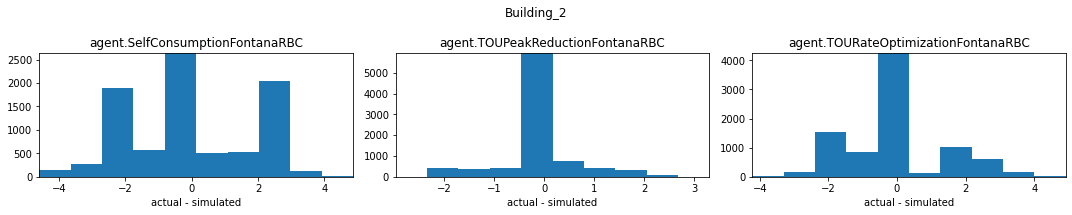

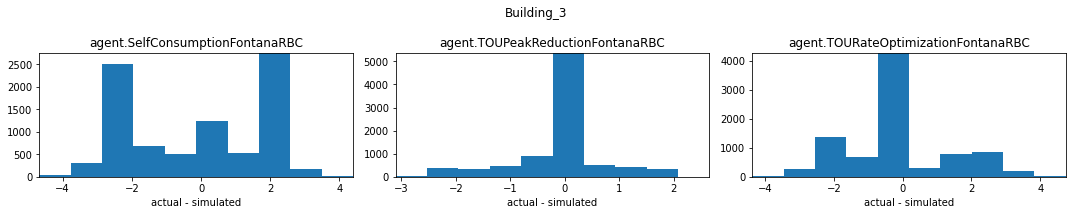

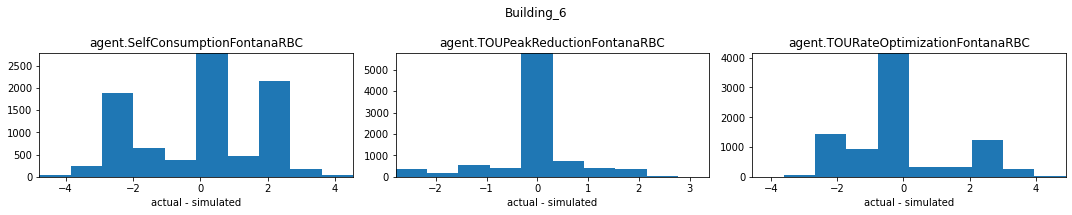

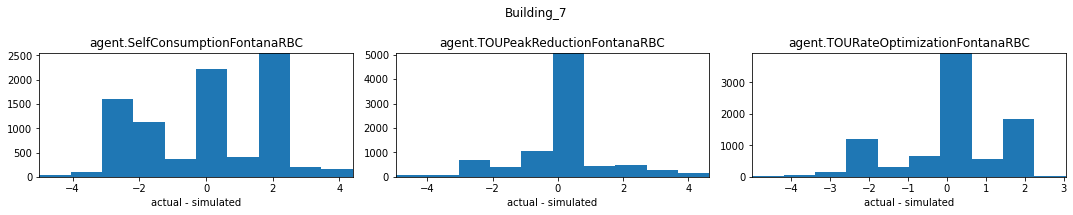

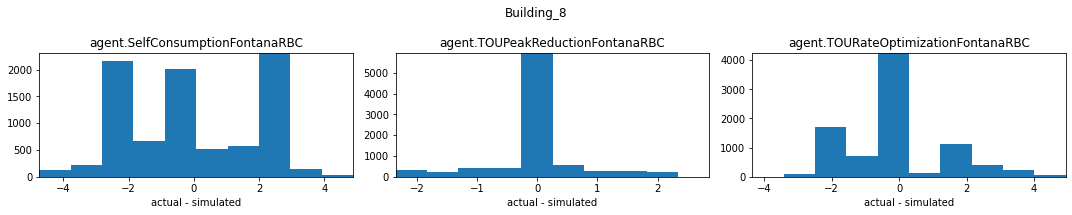

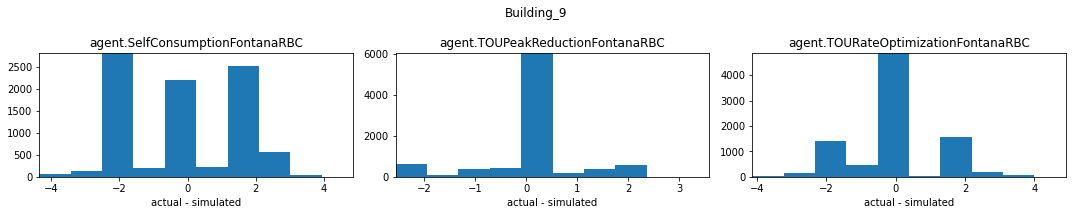

In [144]:
# hourly difference between actual and simulated
for building, building_data in rbc_validation_simulations.groupby('building_id'):
    row_count = 1
    column_count = len(rbc_validation_grid)
    fig, axs = plt.subplots(row_count, column_count, figsize=(5*column_count,3*row_count),sharey=False)

    for ax, (rbc_type, rbc_data) in zip(fig.axes, building_data.groupby('type')):
        x = rbc_data['error']
        ax.hist(x)
        ax.set_xlabel('actual - simulated')
        ax.set_title(rbc_type)
    
    fig.suptitle(building)
    plt.tight_layout()
    plt.show()

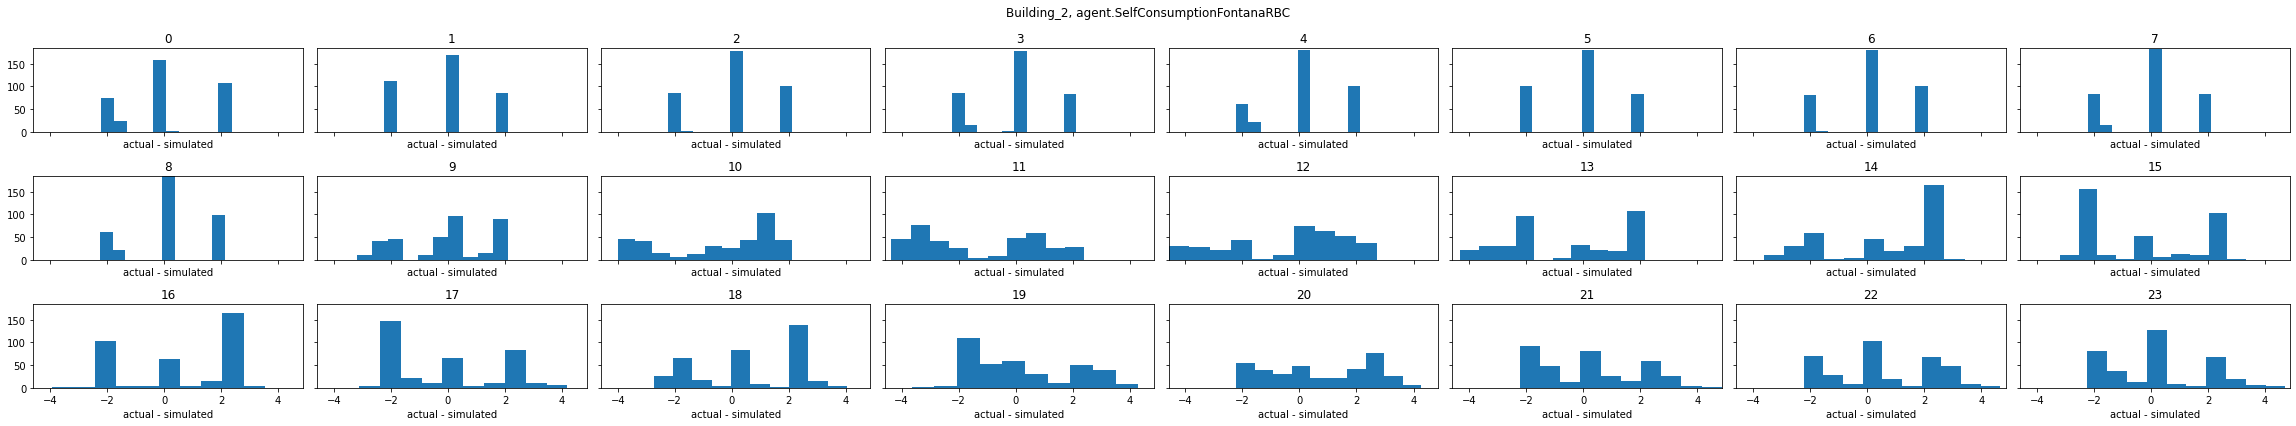

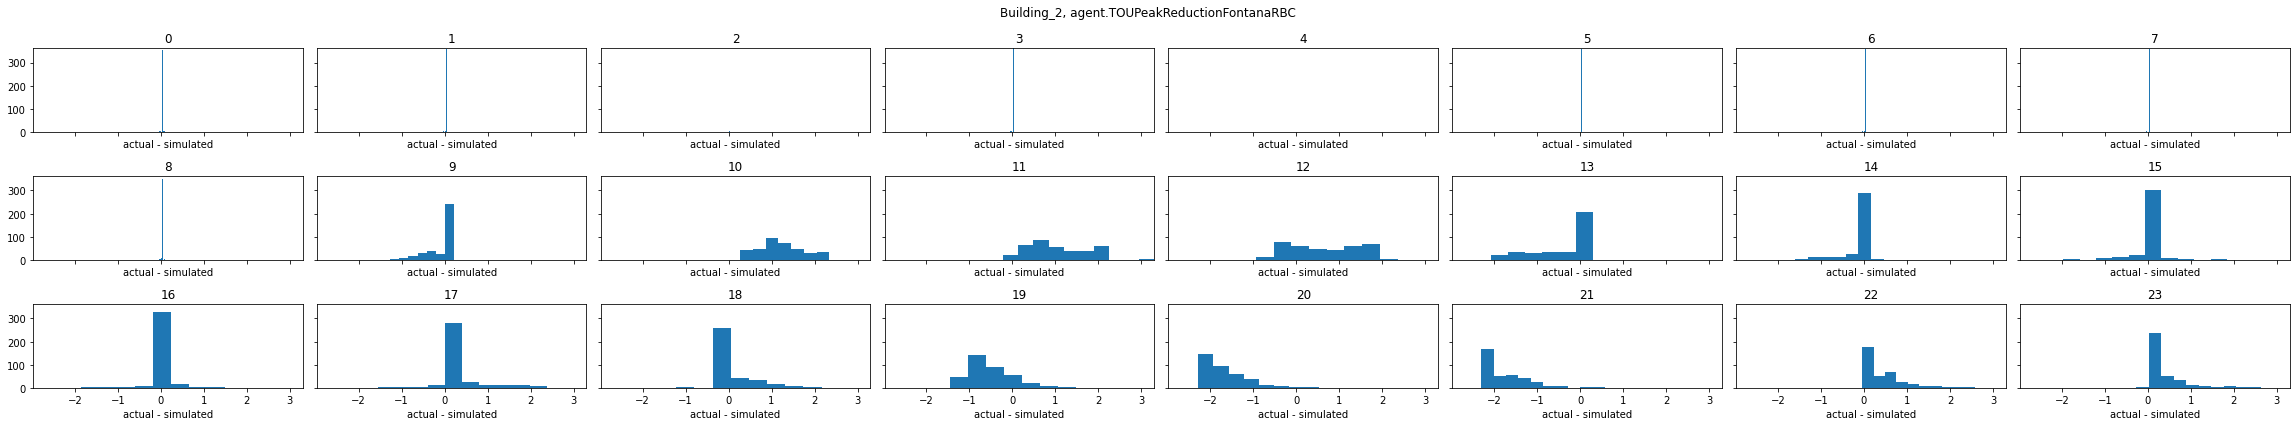

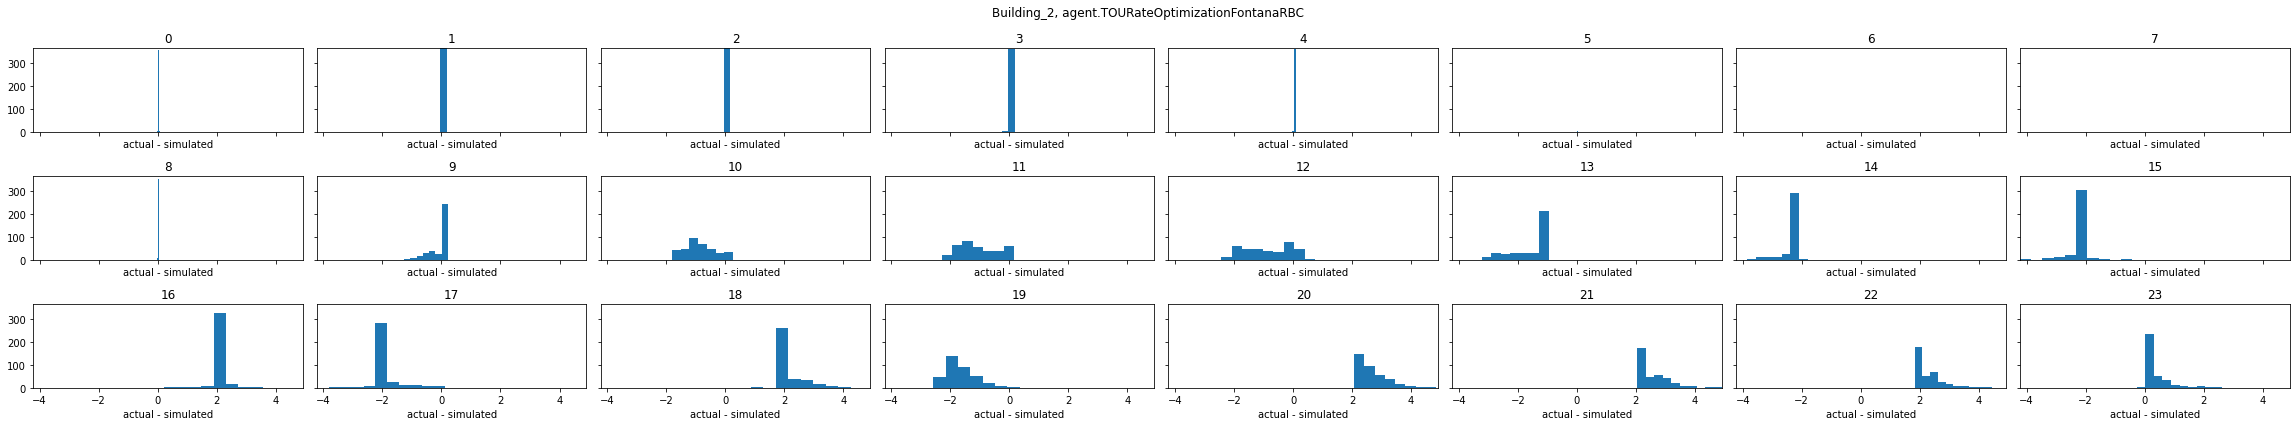

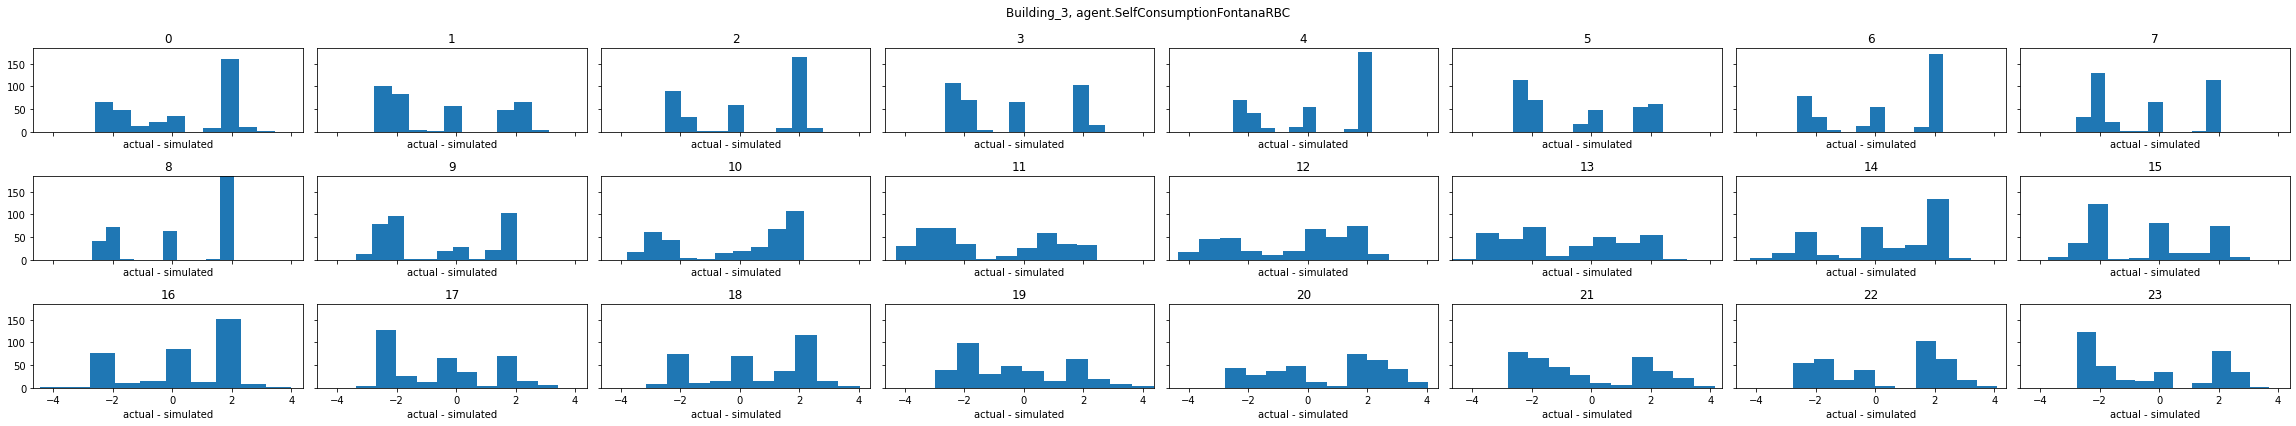

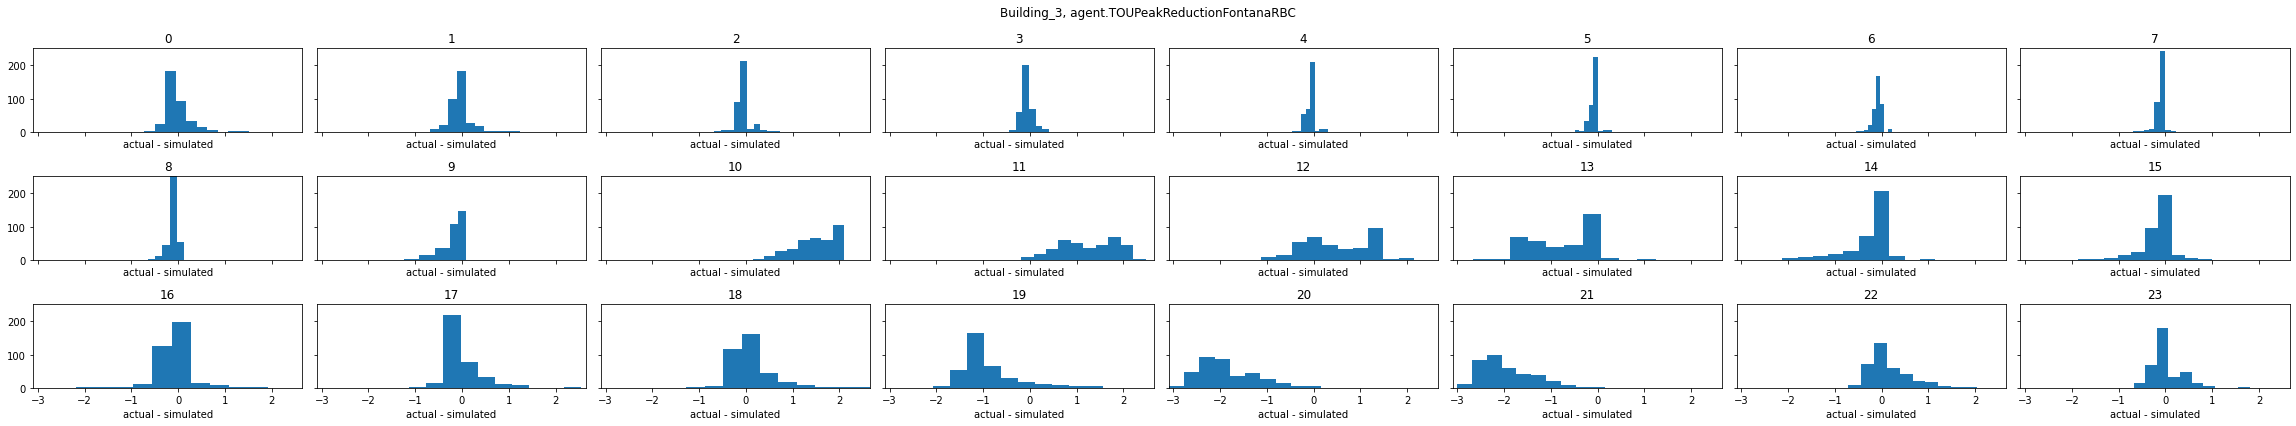

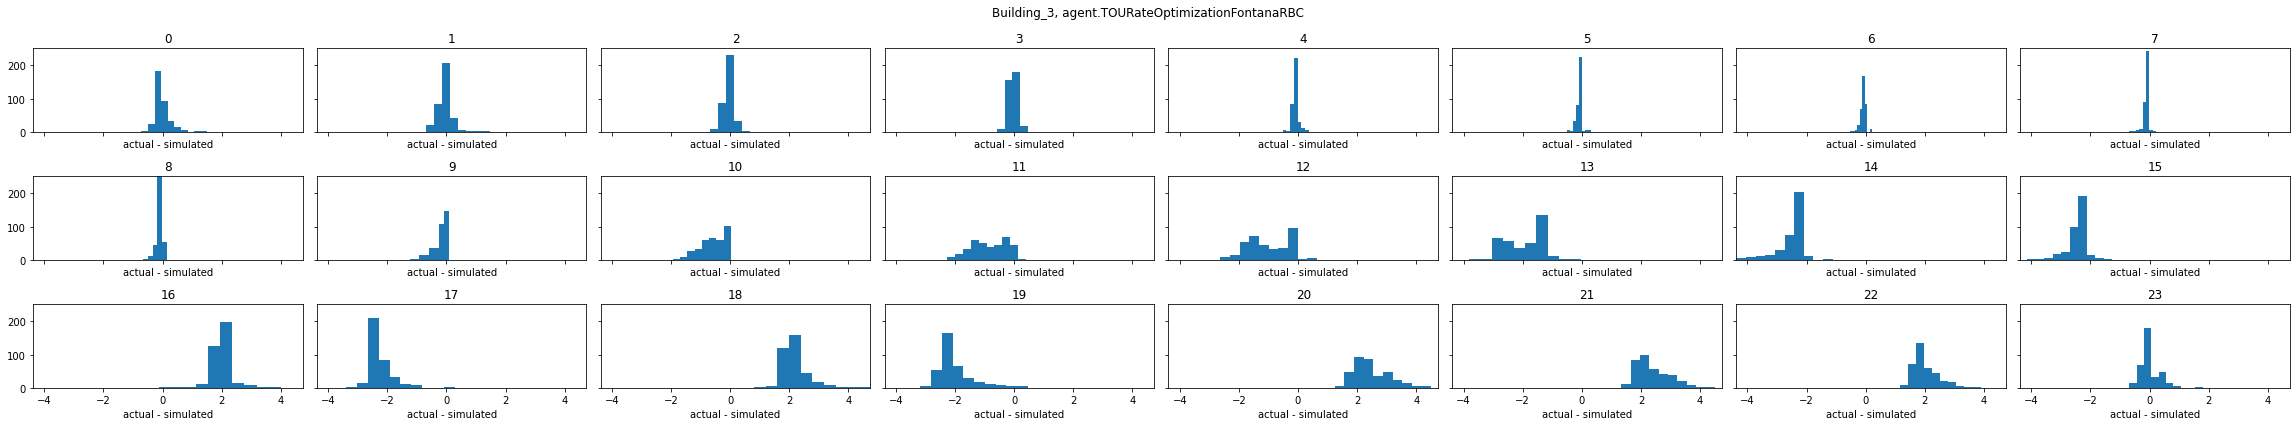

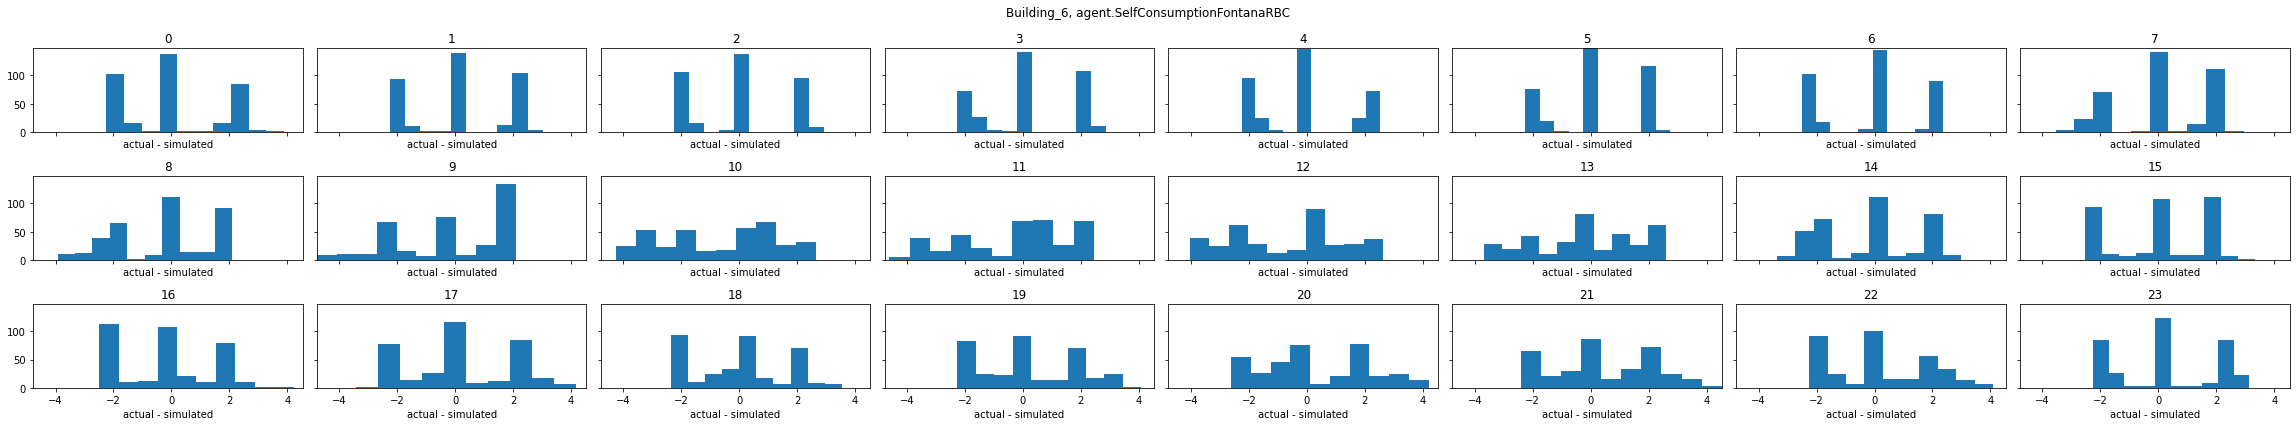

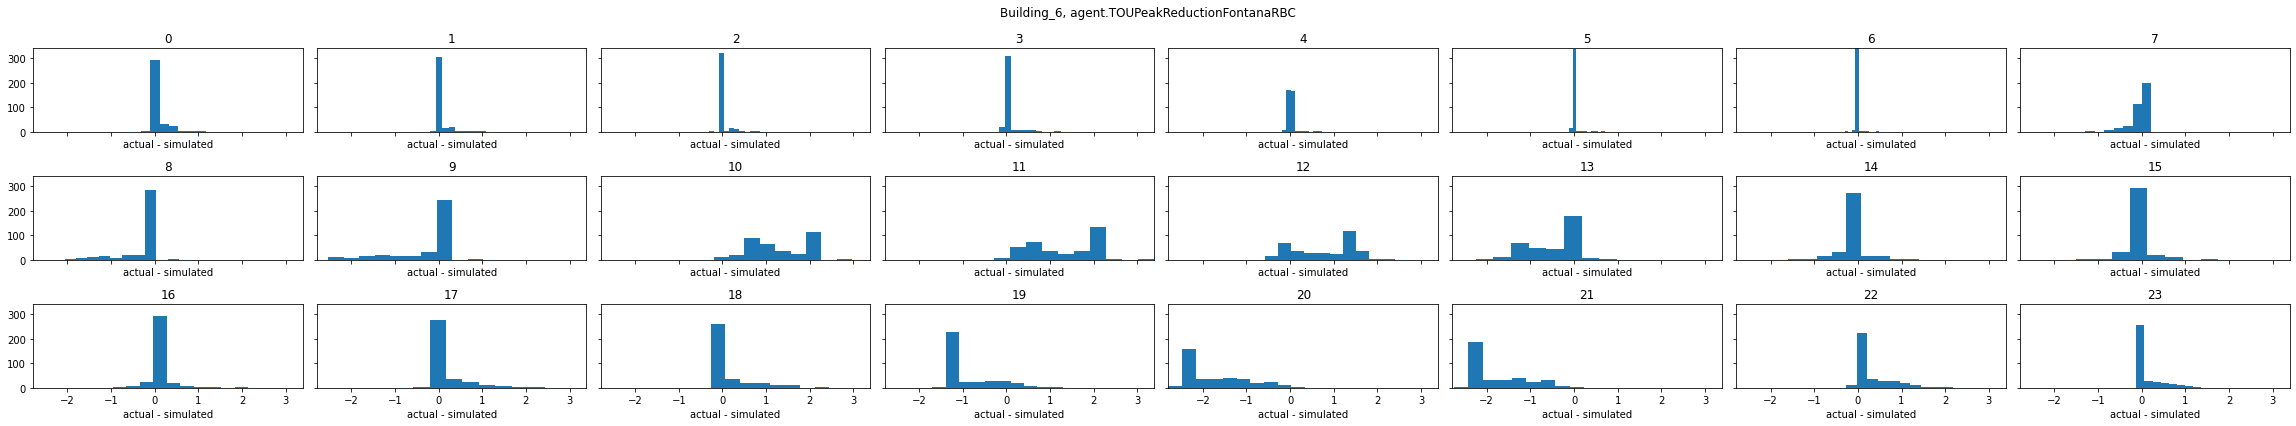

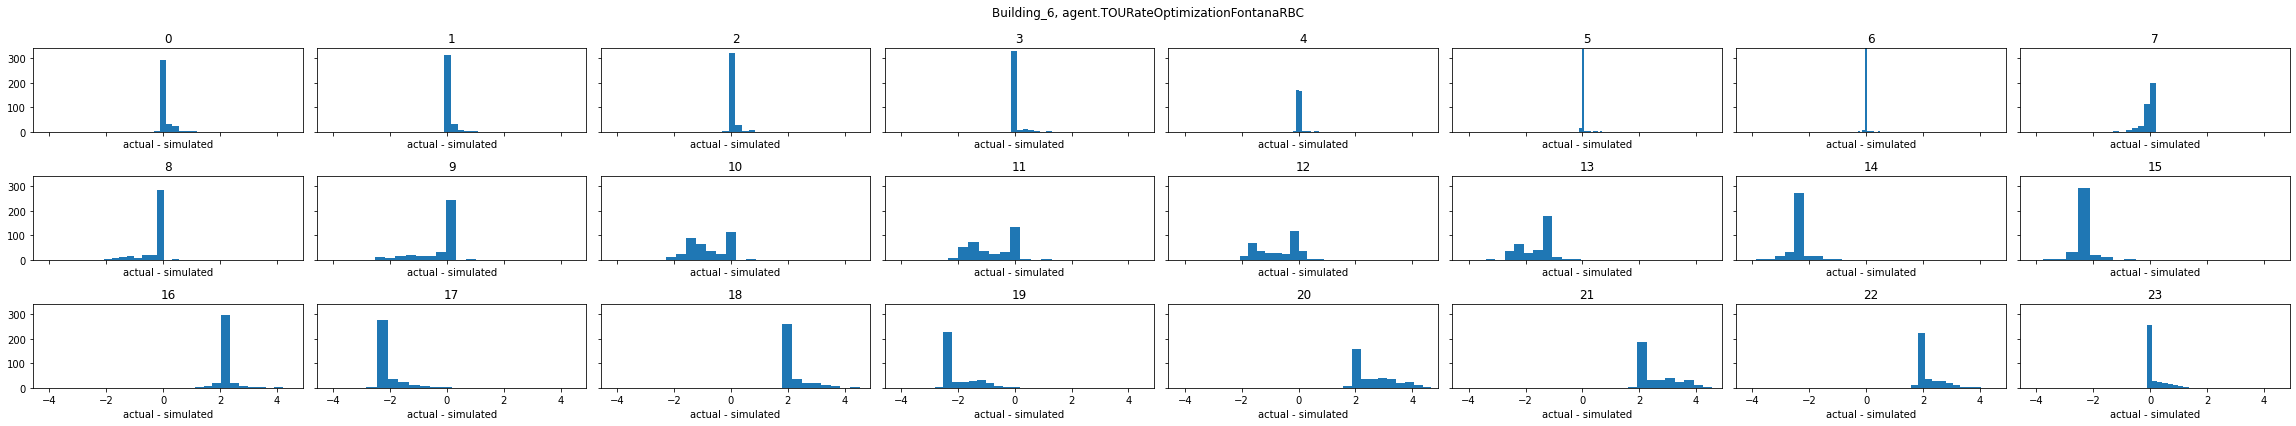

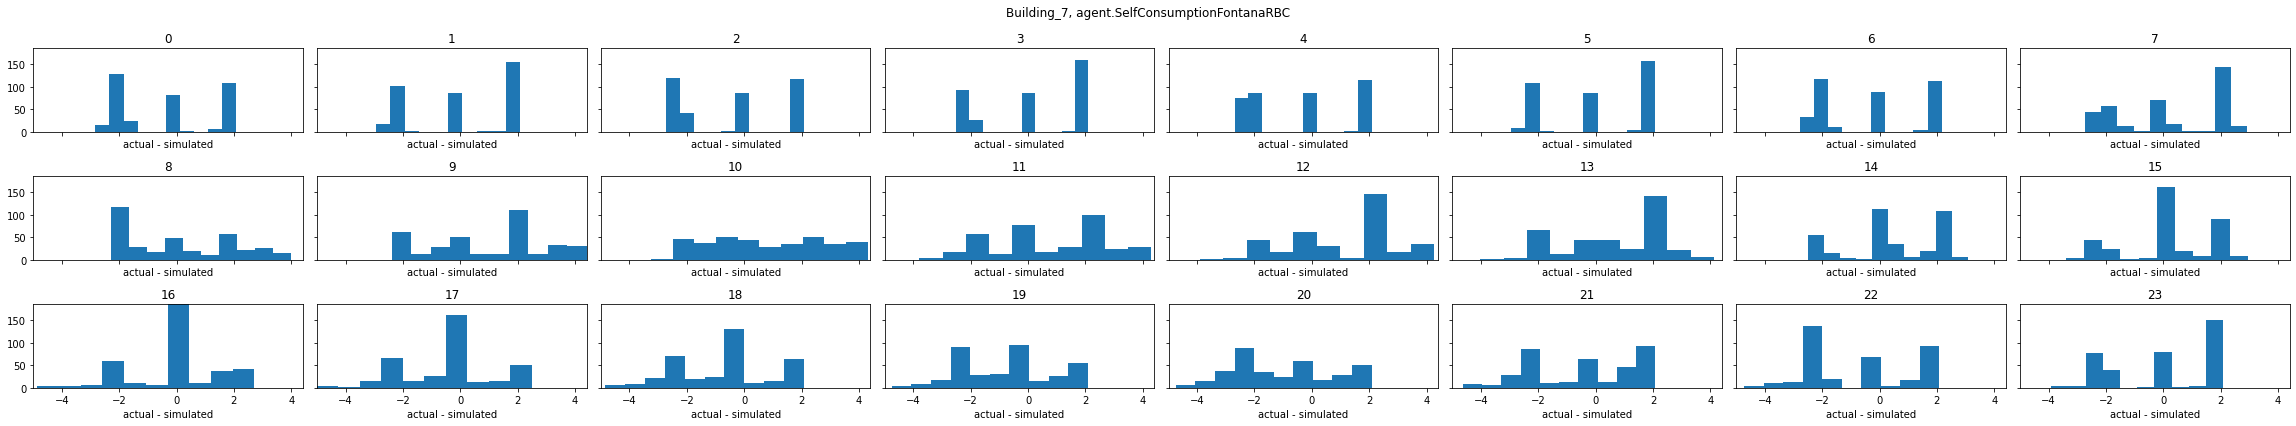

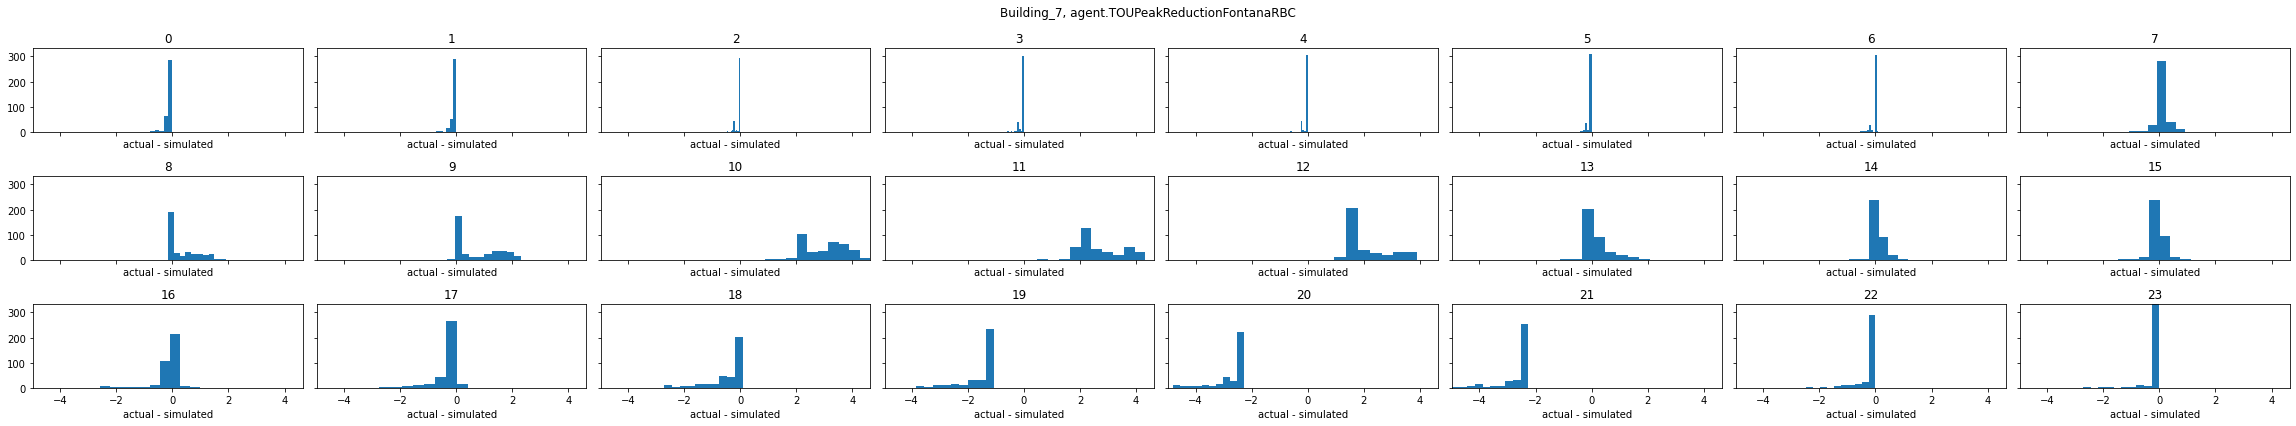

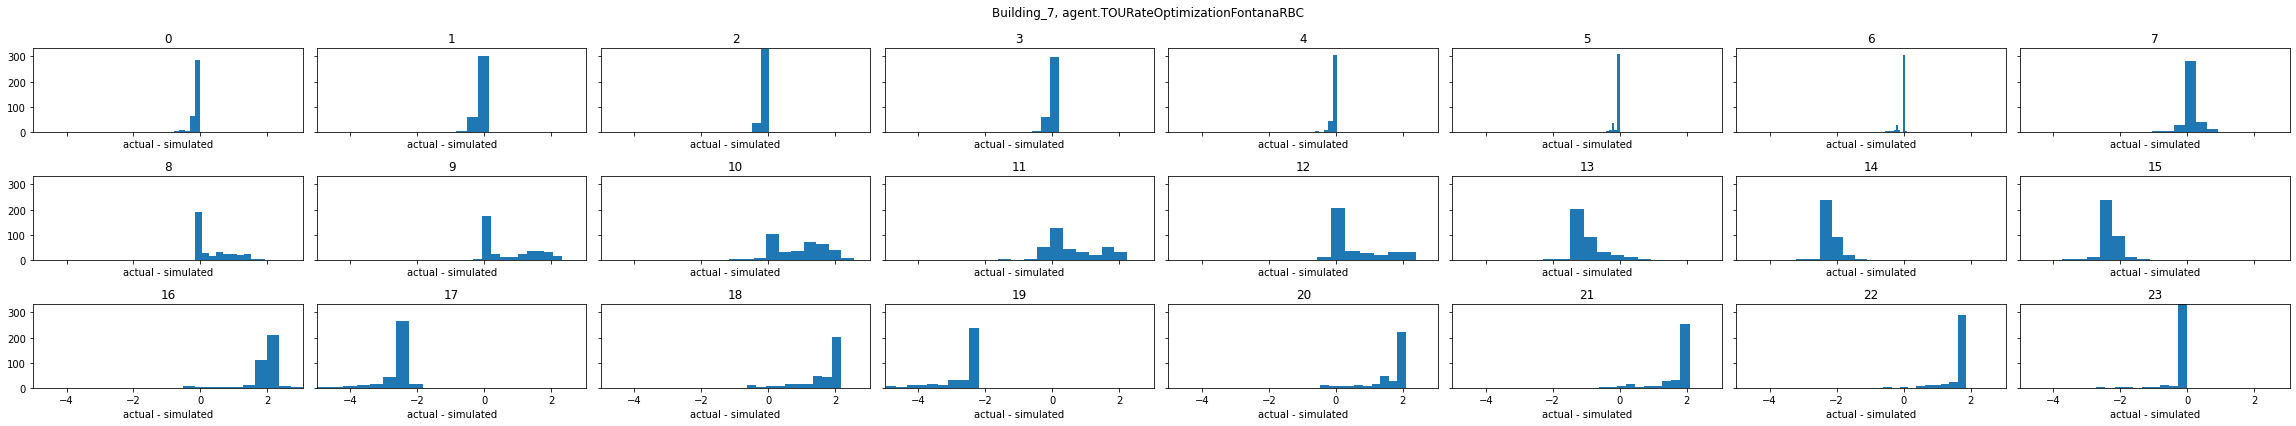

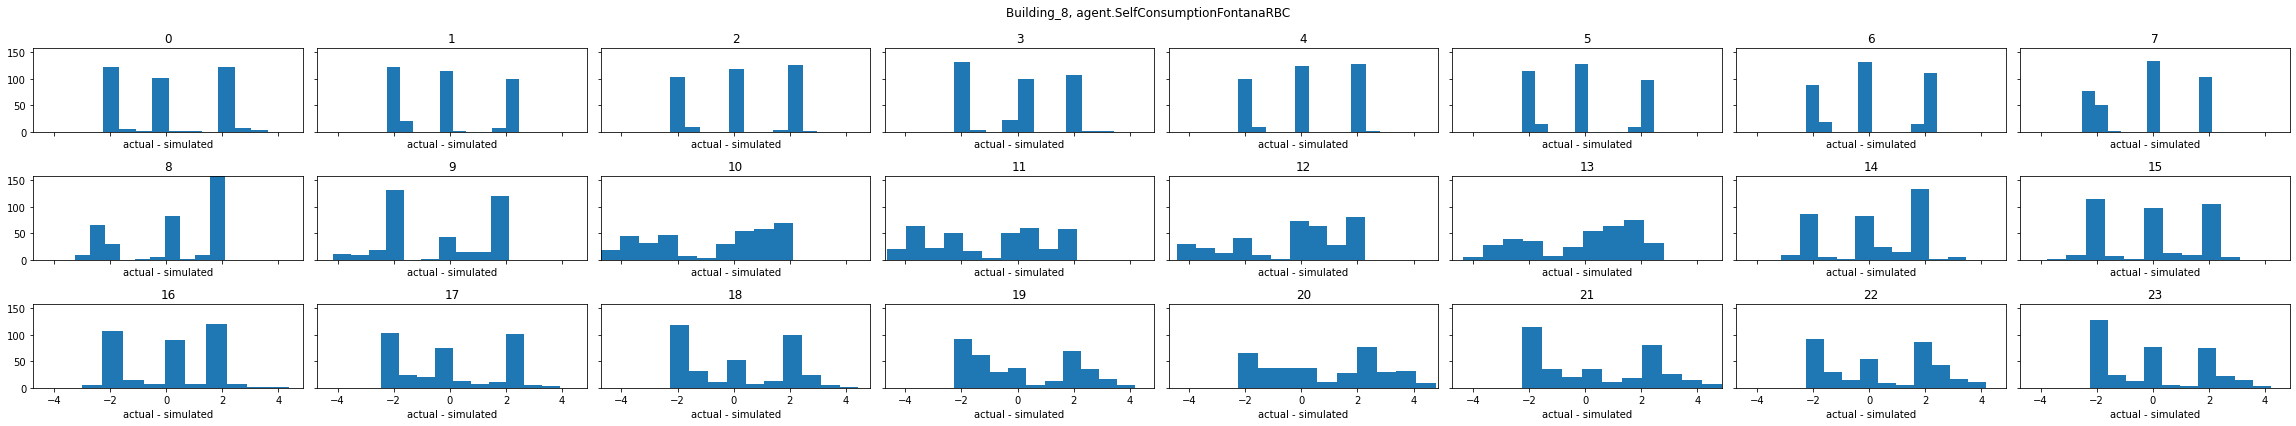

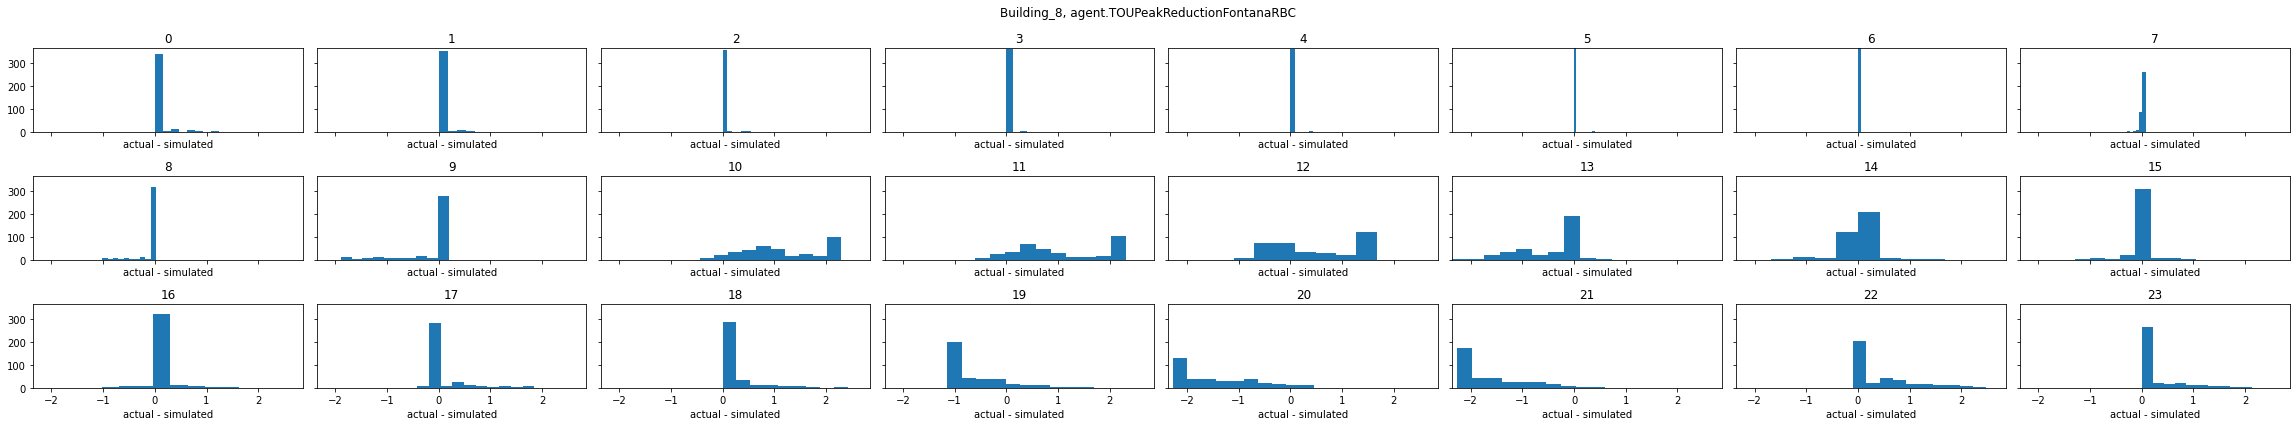

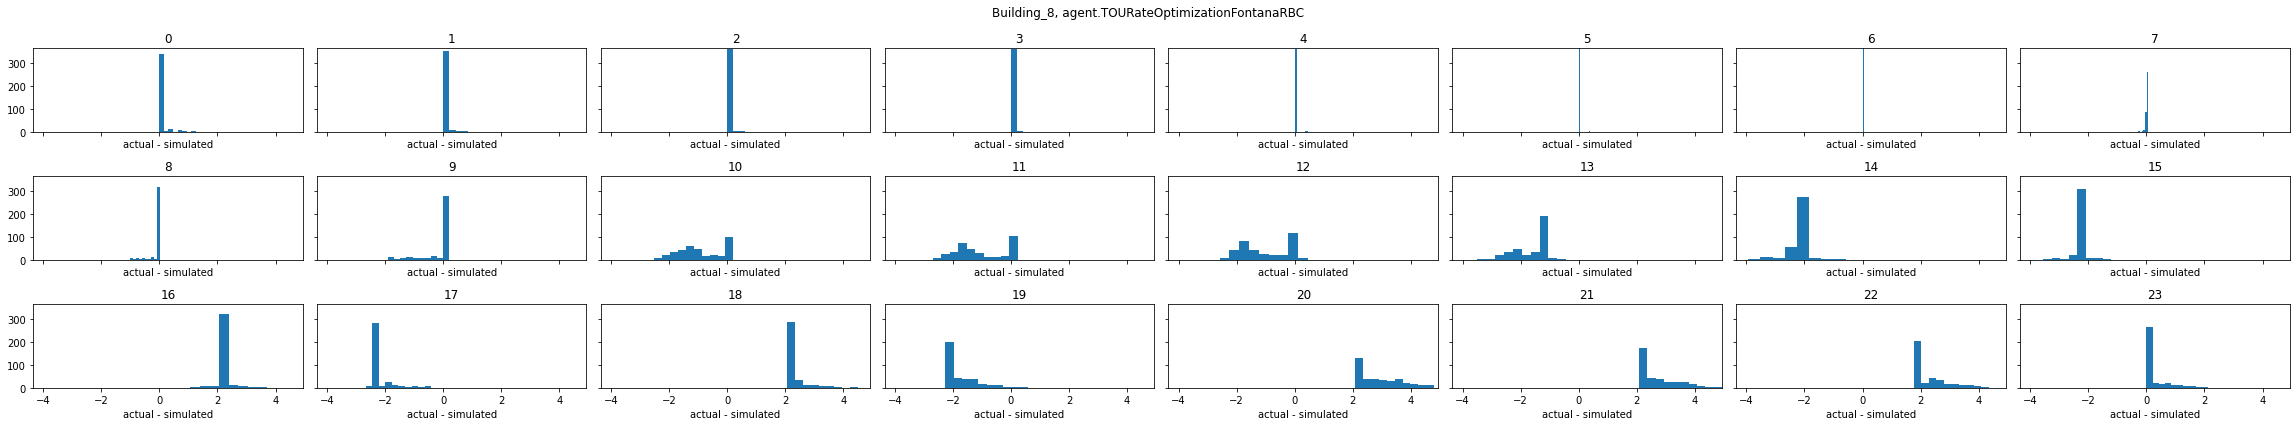

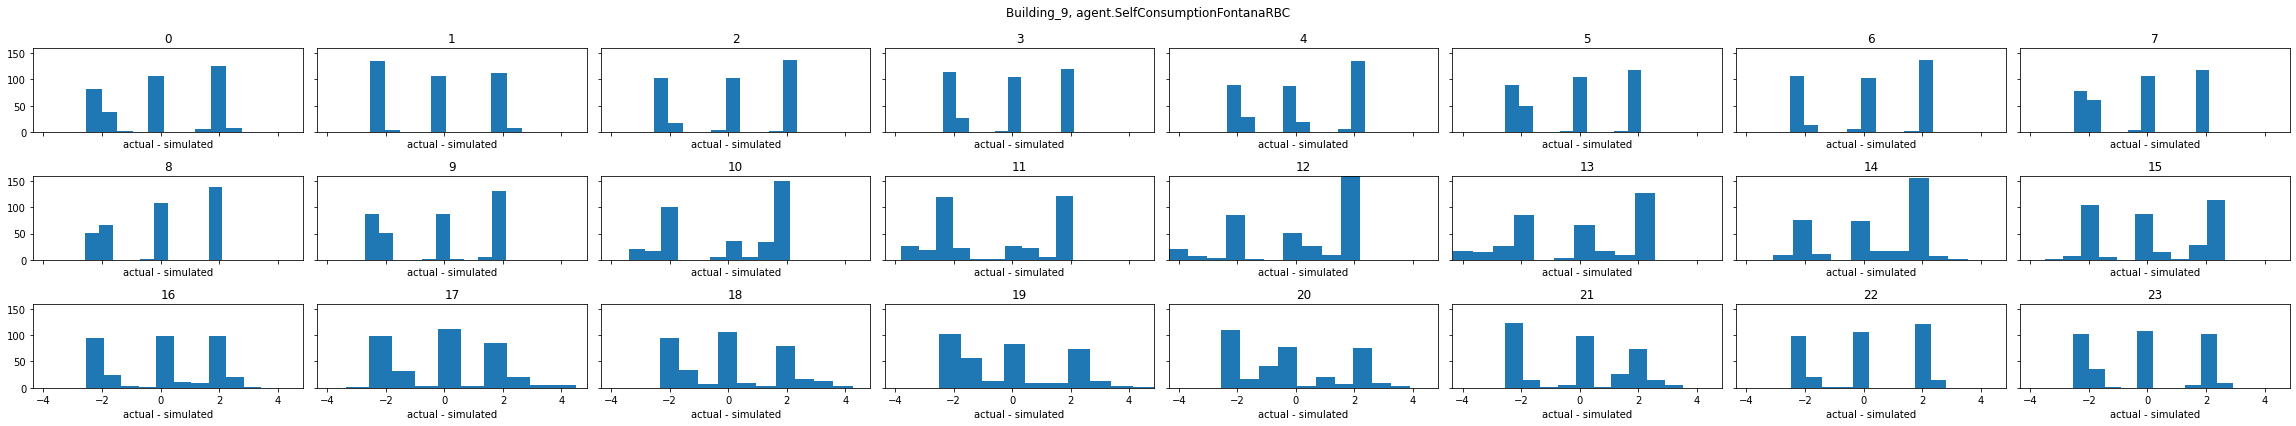

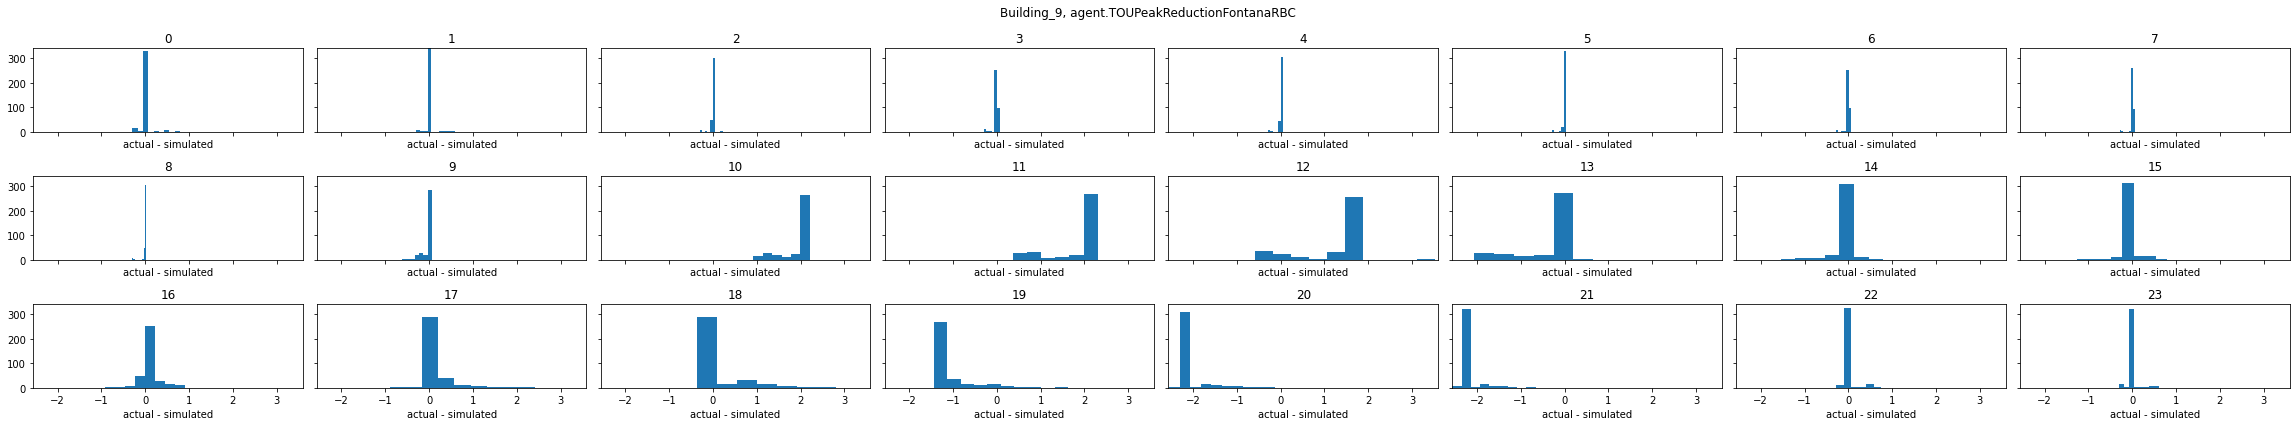

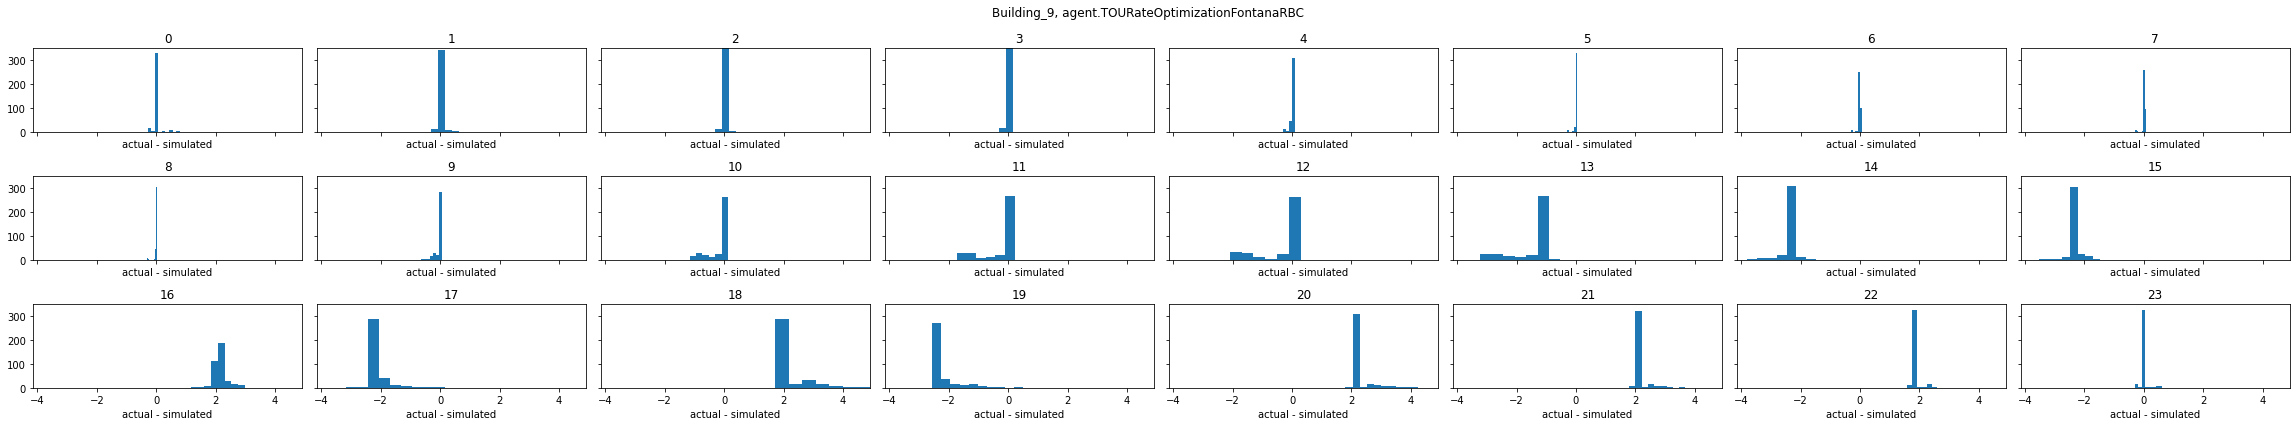

In [131]:
# how are the errors distributed hourly in a histogram?
column_count_limit = 8
hour_count = len(rbc_validation_simulations['hour'].unique())

for building, building_data in rbc_validation_simulations.groupby('building_id'):
    
    for rbc_type, rbc_data in building_data.groupby('type'):
        row_count = math.ceil(hour_count/column_count_limit)
        column_count = min(hour_count,column_count_limit)
        fig, axs = plt.subplots(row_count, column_count, figsize=(4*column_count,2*row_count),sharey=True,sharex=True)

        for ax, (hour, hour_data) in zip(fig.axes,rbc_data.groupby('hour')):
            x = hour_data['error']
            ax.hist(x,bins=10)
            ax.set_xlabel('actual - simulated')
            ax.set_title(hour)
    
        fig.suptitle(f'{building}, {rbc_type}')
        plt.tight_layout()
        plt.show()
    
    # assert False

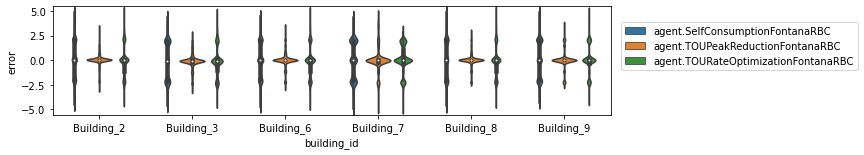

building_id                                 type     error            \
                                                          min       max   
0   Building_2      agent.SelfConsumptionFontanaRBC  0.001650  4.861753   
1   Building_2     agent.TOUPeakReductionFontanaRBC  0.000233  3.298010   
2   Building_2  agent.TOURateOptimizationFontanaRBC  0.000233  4.913941   
3   Building_3      agent.SelfConsumptionFontanaRBC  0.000167  4.672133   
4   Building_3     agent.TOUPeakReductionFontanaRBC  0.000017  3.101256   
5   Building_3  agent.TOURateOptimizationFontanaRBC  0.000017  4.739191   
6   Building_6      agent.SelfConsumptionFontanaRBC  0.000000  4.775136   
7   Building_6     agent.TOUPeakReductionFontanaRBC  0.000000  3.386477   
8   Building_6  agent.TOURateOptimizationFontanaRBC  0.000000  4.904248   
9   Building_7      agent.SelfConsumptionFontanaRBC  0.000000  4.994474   
10  Building_7     agent.TOUPeakReductionFontanaRBC  0.000000  4.964274   
11  Building_7  agent.TOURateOptimizationFontanaRBC  0.000000  4.998356   
12  Building_8      agent.SelfConsumptionFontanaRBC  0.000000  4.873047   
13  Building_8     agent.TOUPeakReductionFontanaRBC  0.000000  2.859277   
14  Building_8  agent.TOURateOptimizationFontanaRBC  0.000000  4.931451   
15  Building_9      agent.SelfConsumptionFontanaRBC  0.000000  4.856503   
16  Building_9     agent.TOUPeakReductionFontanaRBC  0.000000  3.592360   
17  Building_9  agent.TOURateOptimizationFontanaRBC  0.000000  4.902077   

                        
        mean       std  
0   1.438909  1.066928  
1   0.409936  0.631760  
2   1.061169  1.081623  
3   1.725916  0.868908  
4   0.506910  0.667566  
5   1.088785  1.060664  
6   1.389011  1.038571  
7   0.443248  0.685568  
8   1.061734  1.096048  
9   1.556937  1.018017  
10  0.754048  1.114251  
11  0.969708  1.002680  
12  1.591386  1.019862  
13  0.396447  0.647852  
14  1.090658  1.134444  
15  1.543338  0.951925  
16  0.484915  0.800188  
17  0.920427  1.054663

In [148]:
# error summary
rbc_validation_error_summary = rbc_validation_simulations.copy()
rbc_validation_error_summary['error'] = rbc_validation_error_summary['error'].abs()
rbc_validation_error_summary = rbc_validation_error_summary.groupby(['building_id','type'])[['error']].agg([min,max,'mean','std']).reset_index()
fig, ax = plt.subplots(1,1,figsize=(10,2))
sns.violinplot(x='building_id',y='error',data=rbc_validation_simulations,hue='type')
ax.legend(ncol=1,bbox_to_anchor= (1.01,0.9))
plt.show()

display(rbc_validation_error_summary)

# Hyperparameter Design

In [151]:
hyperparameter_design_grid_filepath = os.path.join(misc_directory,'hyperparameter_design_grid.csv')
hyperparameter_design_grid = pd.read_csv(hyperparameter_design_grid_filepath)
completed_simulations = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,]
episodes = 10

# read data
hyperparameter_design_simulations = []


for simulation_id in completed_simulations:
    for episode in range(episodes):
        filepath = os.path.join(result_directory,f'hyperparameter_design_{simulation_id}_episode_{episode}.pkl')
        
        with (open(filepath, 'rb')) as openfile:
            env = pickle.load(openfile)

        cost, carbon_emission = env.evaluate()
        record = {
            'simulation_id':f'hyperparameter_design_{simulation_id}',
            'episode':episode,
            'cost':cost,
            'carbon_emission':carbon_emission,
            'average':(cost + carbon_emission)/2
        }
        hyperparameter_design_simulations.append(record)

hyperparameter_design_simulations = pd.DataFrame(hyperparameter_design_simulations)
hyperparameter_design_simulations = hyperparameter_design_simulations.merge(hyperparameter_design_grid,on='simulation_id',how='inner')

# ordered  results
# hyperparameter_design_simulations = hyperparameter_design_simulations[['simulation_id','type','buildings','w_1','w_2','e','episode','cost','carbon_emission','average']].copy()
hyperparameter_design_simulations = hyperparameter_design_simulations.sort_values('average')
display(hyperparameter_design_simulations[hyperparameter_design_simulations['episode']==9])

,average,carbon_emission,cost,episode,simulation_id,discount,tau,lr,buildings
129,0.993943,1.028333,0.959552,9,hyperparameter_design_12,0.95,0.0050,0.0005,"[1, 13, 14]"
109,1.002410,1.003392,1.001429,9,hyperparameter_design_10,0.95,0.0005,0.0050,"[1, 13, 14]"
119,1.006908,1.010616,1.003200,9,hyperparameter_design_11,0.95,0.0005,0.0500,"[1, 13, 14]"
29,1.007090,1.010929,1.003252,9,hyperparameter_design_2,0.90,0.0005,0.0500,"[1, 13, 14]"
149,1.008142,1.012940,1.003344,9,hyperparameter_design_14,0.95,0.0050,0.0500,"[1, 13, 14]"
19,1.008560,1.016183,1.000938,9,hyperparameter_design_1,0.90,0.0005,0.0050,"[1, 13, 14]"
59,1.009484,1.015033,1.003935,9,hyperparameter_design_5,0.90,0.0050,0.0500,"[1, 13, 14]"
89,1.010287,1.016123,1.004450,9,hyperparameter_design_8,0.90,0.0500,0.0500,"[1, 13, 14]"
49,1.010653,1.022649,0.998657,9,hyperparameter_design_4,0.90,0.0050,0.0050,"[1, 13, 14]"
79,1.012016,1.026612,0.997420,9,hyperparameter_design_7,0.90,0.0500,0.0050,"[1, 13, 14]"
